## 深度学习  
机器学习是人工智能领域的一个方法，神经网络是机器学习这个方法里的一类算法。  
深度学习就是使用深度架构（例如深度神经网络）的机器学习方法。  

隐藏层比较多（大于2）的神经网络叫深度神经网络。  
深层网络与浅层网络相比，表达力更强。  
仅有一个隐藏层的神经网络虽已能拟合任何一个函数，但它需要大量的神经元。而深层网络用少得多的神经元能拟合同样的函数，往往更节约资源。  
深层网络不容易训练，需要大量的数据和很多的技巧才能训练好一个深层网络。  

## 感知器  
神经网络的组成单元叫神经元，也叫做**感知器**。  
下图是一个感知器:  

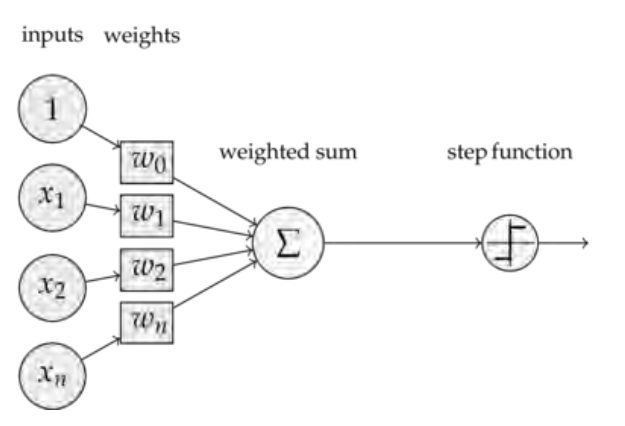
<style>
    img[alt="感知器.png"]{
        height:240px;
        
    }
</style>
一个感知器包括输入权值、激活函数与输出 **y = f ( w · x + b )**

感知器可以拟合任何**线性函数**，任何线性分类或线性回归问题都可以用感知器来解决。  
感知器不能实现异或运算。

### 感知器的训练
将权重项和偏置项初始化为0，利用下面的感知器规则迭代修改权重，直到训练完成。  

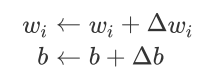  

其中：  

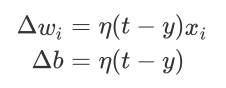  
<style>
    img[alt="感知器2.png"]{
        width:150px;
        
    }
    img[alt="感知器3.png"]{
        width:150px;
        
    }
</style>
wi是与输入xi对应的权重项，b是偏置项（可看作是值永远为1的输入所对应的权重）。  
t是训练样本的实际值，一般称作label。y是感知器的输出值。  
η是一个称作学习速率的常数，作用是控制每一步调整权的幅度。

每次从训练数据中取出一个样本的输入向量x，使用感知器计算其输出y，再根据上面的规则来调整权重。  
**每处理一个样本就调整一次权重**。经过**多轮迭代**后（即全部的训练数据被反复处理多轮），就可以训练出感知器的权重，使之实现目标函数。

In [10]:
# 编程实战：实现感知器
from functools import reduce

# 感知器类
class Perceptron(object):
    def __init__(self, input_num, activator):
        '''
        初始化感知器，设置输入参数的个数，以及激活函数。
        激活函数的类型为double -> double
        '''
        self.activator = activator
        self.weights = [0.0 for _ in range(input_num)]
        self.bias = 0.0

    def __str__(self):
        '''
        打印学习到的权重、偏置
        '''
        return 'weights\t:%s\nbias\t:%f\n' % (self.weights, self.bias)

    def predict(self, input_vec):
        '''
        输入向量，输出感知器的计算结果
        '''
        # 把input_vec[x1, x2, ...]和weights[w1, w2, ...]打包在一起变成[(x1, w1), (x2, w2), ...]
        # 利用map函数计算[x1 * w1, x2 * w2, ...]
        # 最后利用reduce求和
        # return self.activator(reduce(lambda a,b: a+b, map(lambda (x,w): x*w, zip(input_vec, self.weights)), 0.0) + self.bias)
        return self.activator(reduce(lambda a,b: a+b, list(map(lambda x, w: x*w, input_vec, self.weights)), 0.0) + self.bias)

    def train(self, input_vecs, lables, iteration, rate):
        '''
        输入训练数据：一组向量、对应的lable、训练轮数、学习率
        '''
        for i in range(iteration):
            self._one_iteration(input_vecs, lables, rate)

    def _one_iteration(self, input_vecs, lables, rate):
            '''
            一次迭代，把所有训练数据过一遍
            '''
            # 把输入和输出打包成训练样本的列表[(input_vec, lable), ...]
            samples = zip(input_vecs, lables)
            # 对每个样本按照规则更新权重
            for (input_vec, lable) in samples:
                output = self.predict(input_vec)
                self._updata_weights(input_vec, output, lable, rate)
    
    def _updata_weights(self, input_vec, output, lable, rate):
        '''
        按照感知器规则更新权重
        '''
        # 把input_vec[x1,x2,x3,...]和weights[w1,w2,w3,...]打包在一起变成[(x1,w1),(x2,w2),(x3,w3),...]
        # 然后利用感知器规则更新权重
        delta = lable - output
        # self.weights = map(lambda (x,w): w+rate*delta*x, zip(input_vec, self.weights))
        self.weights = list(map(lambda x,w: w+rate*delta*x, input_vec, self.weights))
        self.bias += rate * delta



# 实现 and 函数
def f(x):
    '''
    定义激活函数f
    '''
    return 1 if x > 0 else 0

def get_training_dataset():
    '''
    基于and真值表构造训练数据
    '''
    input_vecs = [[1,1], [0,0], [1,0], [0,1]]
    lables = [1, 0, 0, 0]
    return input_vecs, lables

def train_and_perceptron():
    '''
    使用and真值表训练感知器
    '''
    p = Perceptron(2, f)
    input_vecs, lables = get_training_dataset()
    p.train(input_vecs, lables, 10, 0.1)
    # 返回训练好的感知器
    return p


if __name__ == '__main__':
    # 训练and感知器
    and_perceptron = train_and_perceptron()
    # 打印训练获得的权重
    print(and_perceptron)
    # 测试
    print('1 and 1 = %d' % and_perceptron.predict([1, 1]))
    print('0 and 0 = %d' % and_perceptron.predict([0, 0]))
    print('1 and 0 = %d' % and_perceptron.predict([1, 0]))
    print('0 and 1 = %d' % and_perceptron.predict([0, 1]))



weights	:[0.1, 0.2]
bias	:-0.200000

1 and 1 = 1
0 and 0 = 0
1 and 0 = 0
0 and 1 = 0


## 线性单元
当数据集**不是线性可分**的时候，“感知器规则”可能无法收敛，无法完成一个感知器的训练。  
为了解决这个问题，可用一个**可导的线性函数**来替代感知器的阶跃函数，这种感知器就叫做**线性单元**。  
线性单元在面对线性不可分的数据集时，会收敛到一个最佳的近似上。  

线性单元如下图所示:  

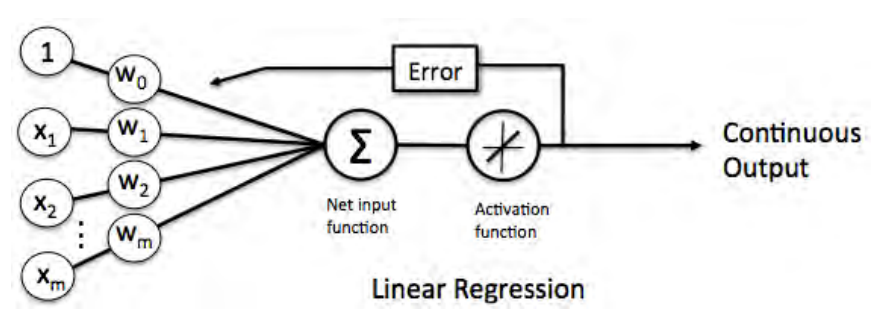
<style>
    img[alt="线性单元.png"]{
        height:230px;
        
    }
</style>

对比之前的感知器，替换了激活函数f之后，线性单元将返回一个实数值而不是0, 1分类。因此线性单元用来解决**回归问题**而不是分类问题。

### 线性单元的模型  
谈到模型时，我们实际上在谈论根据输入x预测输出y的算法。  

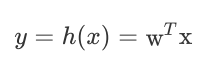
<style>
    img[alt="线性单元2.png"]{
        height:45px;
        
    }
</style>

长成这种样子模型就叫做线性模型，因为输出y就是输入特征x1, x2, x3, ...的线性组合。


### 监督学习和无监督学习  
监督学习：每个训练样本既包括输入特征x，也包括对应的输出y。当模型看到足够多的样本之后，就能总结出一些规律，就可以预测那些它没看过的输入所对应的答案了。  
无监督学习：训练样本中只有x而没有y。模型可以总结出特征x的一些规律，但是无法知道其对应的答案y。  

很多时候，既有x又有y的训练样本是很少的，大部分样本都只有x。

### 线性单元的目标函数  
在监督学习下，对于一个样本，我们知道特征x以及标记y。同时，我们还可以根据模型h(x)计算得到输出y'。  
我们希望模型计算出来的y'和y越接近越好。  

数学上有很多方法来表示的y'和y的接近程度，比如我们可以用y'和y的差的平方的1/2来表示它们的接近程度:  

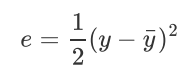

e叫做单个样本的误差。乘1/2是为了后面计算方便。  
我们可以用训练数据中所有样本的误差的和，来表示模型的误差E:

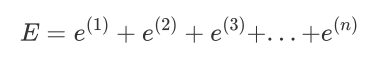

其中：  

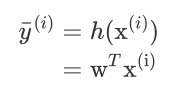

我们希望对于一个训练数据集来说，误差最小越好。对于特定的训练数据集来说，(x(i), y(i))的值都是已知的，所以E其实是参数w的函数:

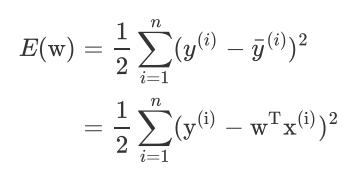
<style>
    img[alt="线性单元3.png"]{
        height:50px;
        
    }
    img[alt="线性单元4.png"]{
        height:40px;
        
    }
    img[alt="线性单元5.png"]{
        height:65px;
        
    }
    img[alt="线性单元6.png"]{
        height:110px;
        
    }
</style>

模型的训练，实际上就是求取到合适的w，使E取得最小值，这在数学上称作**优化问题**。而E(w)就是我们优化的目标，称之为**目标函数**。  

### 梯度下降优化算法  
----一步一步把函数的极值点试出来。

梯度是一个向量，它指向函数值上升最快的方向。梯度的反方向就是函数值下降最快的方向。  
每次都向函数y=f(x)的梯度的相反方向来修改x，最终就能走到函数的最小值附近。  

步长如果选择小了，会迭代很多轮才能走到最小值附近；如果选择大了，那可能就会越过最小值很远，收敛不到一个好的点上。

梯度下降算法的公式:  

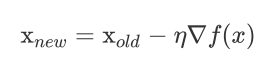  
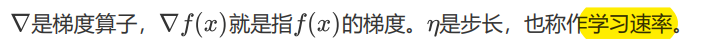

如果要求目标函数的最大值，就应该用梯度上升算法：  

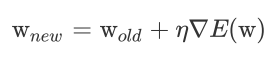

E(w)的梯度是：  

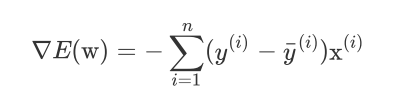

线性单元的参数修改规则：  

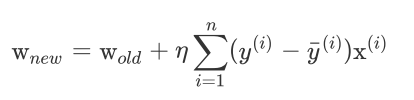
<style>
    img[alt="梯度下降.png"]{
        height:45px;
        
    }
    img[alt="梯度下降2.png"]{
        height:30px;
        
    }
    img[alt="梯度下降3.png"]{
        height:50px;
        
    }
    img[alt="梯度下降4.png"]{
        height:65px;
        
    }
    img[alt="梯度下降5.png"]{
        height:70px;
        
    }
</style>

如果每个样本有M个特征，则上式中的x, w都是M+1维向量，y是标量。

### 随机梯度下降算法（SGD）  
若根据上述规则训练模型，每次更新w，要遍历训练数据中所有的样本进行计算。我们称这种算法为批梯度下降（BGD）。  
如果样本量非常大，计算量会异常巨大。 

更实用的算法是SGD算法。在SGD算法中，每次更新w的迭代，只计算一个样本。这样对于一个具有数百万样本的训练数据，完成一次遍历就会对w更新数百万次，效率大大提升。  

由于样本的噪音和随机性，每次更新w并不一定按照减少E的方向。但大量的更新总体上是沿着减少E的方向上前进的，因此最后也能收敛到最小值附近。  

SGD不仅仅效率高，而且随机性有时候反而是好事。对于非凸函数来说，存在许多局部最小值。随机性有助于我们逃离某些很糟糕的局部最小值，获得一个更好的模型。  

In [11]:
# 实现线性单元
# 除了激活函数f不同之外，感知器和线性单元的模型和训练规则是一样的。
# 只需要把感知器的激活函数进行替换即可。

# 定义激活函数f
f = lambda x: x

class LinearUnit(Perceptron):
    def __init__(self, input_num):
        Perceptron.__init__(self, input_num, f)

# 测试
def get_training_dataset():
    '''
    捏造5人的收入数据，构建训练数据
    '''
    # 输入向量列表，每一项是工作年限
    input_vecs = [[5], [3], [8], [1.4], [10.1]]
    # 期望的输出列表，月薪，注意要与输入一一对应
    labels = [5500, 2300, 7600, 1800, 11400]
    return input_vecs, labels

def train_linear_unit():
    '''
    使用数据训练线性单元
    '''
    # 创建感知器，输入参数的特征数为1（工作年限）
    lu = LinearUnit(1)
    # 训练，迭代10轮, 学习速率为0.01
    input_vecs, labels = get_training_dataset()
    lu.train(input_vecs, labels, 10, 0.01)
    #返回训练好的线性单元
    return lu

if __name__ == '__main__':
    # 训练线性单元
    linear_unit = train_linear_unit()
    # 打印训练获得的权重
    print(linear_unit)
    # 测试
    print('Work 3.4 years, monthly salary = %.2f' % linear_unit.predict([3.4]))
    print('Work 15 years, monthly salary = %.2f' % linear_unit.predict([15]))
    print('Work 1.5 years, monthly salary = %.2f' % linear_unit.predict([1.5]))
    print('Work 6.3 years, monthly salary = %.2f' % linear_unit.predict([6.3]))

weights	:[1124.0634970262222]
bias	:85.485289

Work 3.4 years, monthly salary = 3907.30
Work 15 years, monthly salary = 16946.44
Work 1.5 years, monthly salary = 1771.58
Work 6.3 years, monthly salary = 7167.09


实际上，一个机器学习算法只有两部分：  
**模型h(x)**与**目标函数**  
目标函数取最小(最大)值时所对应的参数值，就是模型的参数的最优值。很多时候我们只能获得目标函数的局部最小(最大)值，因此也只能得到模型参数的局部最优值。  
接下来，用**优化算法**去求取目标函数的最小(最大)值。  
[随机]梯度{下降|上升}算法就是一个优化算法。针对同一个目标函数，不同的优化算法会推导出不同的训练规则。  

其实在机器学习中，算法往往并不是关键，真正的关键之处在于**特征选取**。  
而神经网络算法的一个优势，就在于它能够自动学习到应该提取什么特征。

## 神经元
神经元和感知器本质上是一样的。只不过感知器的激活函数是阶跃函数，神经元的激活函数往往选择为sigmoid函数或tanh函数。  
输出y：  

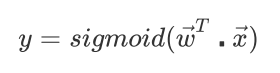  
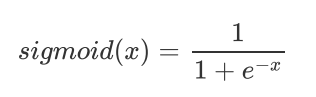

sigmoid函数是一个非线性函数，值域是(0,1)。函数图像如下图所示：  

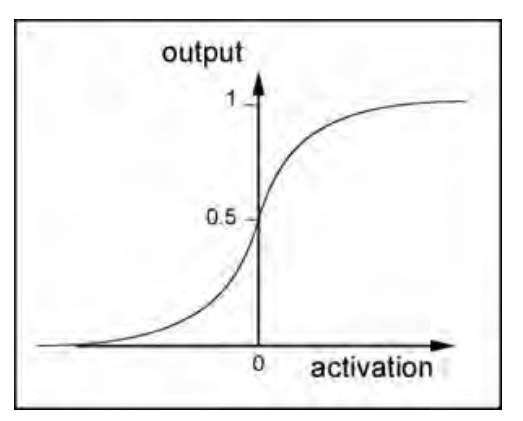
<style>
    img[alt="神经元.png"]{
        height:50px;
    }
    img[alt="神经元2.png"]{
        height:55px;  
    }
    img[alt="神经元3.png"]{
        height:230px;        
    }
</style>

sigmoid函数的导数是：  
令 y = sigmoid(x), 则 y′ = y(1 − y)  
sigmoid函数的导数可以用sigmoid函数自身来表示。  

## 神经网络  
神经网络其实就是按照一定规则连接起来的多个神经元。  
全连接(full connected, FC) 神经网络：  
* 由输入层、隐藏层、输出层组成；  
* 同一层的神经元之间没有连接；  
* **第N层的每个神经元和第N-1层的所有神经元相连**，第N-1层神经元的输出就是第N层神经元的输入；  
* 每个连接都有一个权值。  

不同结构的神经网络具有不同的连接规则。

### 神经网络的输出
神经网络实际上就是一个输入向量x到输出向量y的**函数**。  
首先将输入向量x的每个元素xi的值赋给神经网络的输入层的对应神经元，然后依次向前计算每一层的每个神经元的值。直到最后一层输出层的所有神经元的值计算完毕，最后将输出层每个神经元的值串在一起就得到了输出向量y。

输入向量的**维度**和输入层**神经元个数**相同，而输入向量的某个元素对应到哪个输入节点是可以自由决定的。  
在给权重wji编号时，我们把目标节点的编号j放在前面，把源节点的编号i放在后面。  
输出向量的维度和输出层神经元个数相同。  

### 神经网络的矩阵表示
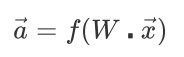
<style>
    img[alt="神经网络.png"]{
        height:40px;
    }
</style>

f是激活函数，W是某一层的权重矩阵，x是某层的输入向量，a是某层的输出向量。  
上式说明神经网络的每一层的作用实际上就是先将输入向量每个元素左乘一个数组进行**线性变换**，得到一个新的向量，然后再对这个向量逐元素应用一个**激活函数**。

### 神经网络的训练
一个神经网络的连接方式、网络的层数、每层的节点数这些参数，是人为事先设置的。对于这些人为设置的参数，我们称之为**超参数**。  

#### 反向传播算法  
我们以监督学习为例来解释反向传播算法，设神经元的激活函数f为sigmoid函数。  

假设每个训练样本为(x, t)，向量x是训练样本的特征，t是样本的目标值。  
首先，用样本的特征x，计算出神经网络中每个隐藏层节点的输出ai，以及输出层每个节点的输出yi。  
然后，我们按照下面的方法计算出每个节点的误差项δi：  
- 对于输出层节点i：  

  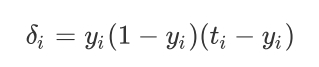  
- 对于隐藏层节点：  

  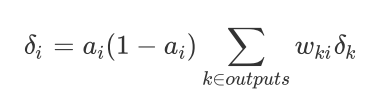  
ai是节点i的输出值，wki是节点i到它的下一层节点k的连接权重，δk是节点i的下一层节点k的误差项。

最后，更新每个连接上的权值： 

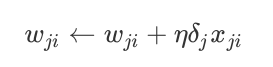  
wji是节点i到节点j的权重，η是一个成为学习速率的常数，δj是节点j的误差项，xji是节点i传递给节点j的输入。偏置项的输入值永远为1。  
<style>
    img[alt="反向传播.png"]{
        height:45px;
    }
    img[alt="反向传播2.png"]{
        height:60px;  
    }
    img[alt="反向传播3.png"]{
        height:50px;        
    }
</style>

计算一个节点的误差项，需要先计算每个与其相连的**下一层**节点的误差项。  
这就要求误差项的计算顺序必须是从输出层开始，然后反向依次计算每个隐藏层的误差项，直到与输入层相连的那个隐藏层。  
当所有节点的误差项计算完毕后，就可以更新所有的权重。  

**如果激活函数不同、误差计算方式不同、网络连接结构不同、优化算法不同，则具体的训练规则也会不一样。**  

### 神经网络的实现
实现一个基本的**全连接**神经网络。  
可以分解出**5**个领域对象来实现神经网络：  
- Network 神经网络对象，提供API接口。它由若干层对象组成以及连接对象组成。  
- Layer 层对象，由多个节点组成。   
- Node 节点对象计算和记录节点自身的信息(比如输出值a、误差项δ等)，以及与这个节点相关的上下游的连接。  
- Connection 每个连接对象都要记录该连接的权重。  
- Connections 仅仅作为Connection的集合对象，提供一些集合操作。  

In [ ]:
# Node
# 节点类，负责记录和维护节点自身信息以及与这个节点相关的上下游连接，实现输出值和误差项的计算。
class Node(object):
    def __init__(self, layer_index, node_index):
        '''
        构造结点对象
        layer_index: 结点所属的层的编号
        node_index: 结点的编号
        '''
        self.layer_index = layer_index
        self.node_index = node_index
        self.downstream = []
        self.upstream = []
        self.output = 0
        self.delta = 0
    
    def set_output(self, output):
        '''
        设置节点输出值。若节点属于输入层会用到这个函数
        '''
        self.output = output
    
    def append_downstream_connection(self, conn):
        '''
        添加一个到下游节点的连接
        '''
        self.downstream.append(conn)

    def append_upstream_connection(self, conn):
        '''
        添加一个到上游节点的连接
        '''
        self.upstream.append(conn)

    def calc_output(self):
        '''
        根据式1计算节点的输出
        '''
        output = reduce(lambda ret, conn: ret + conn.upstream_node.output * conn.weight, self.upstream, 0)
        self.output = sigmoid(output)

    def calc_hidden_layer_delta(self):
        '''
        节点属于隐藏层时，根据式4计算delta
        '''
        downstream_delta = reduce(lambda ret, conn: ret + conn.downstream_node.delta * conn.weight, self.downstream, 0.0)
        self.delta = self.output * (1 - self.output) * downstream_delta

    def calc_output_layer_delta(self, label):
        '''
        节点属于输出层时，根据式3计算delta
        '''
        self.delta = self.output * (1 - self.output) * (label - self.output)

    def __str__(self):
        '''
        打印节点的信息
        '''
        node_str = '%u-%u: output: %f delta: %f' % (self.layer_index, self.node_index, self.output, self.delta)
        downstream_str = reduce(lambda ret, conn: ret + '\n\t' + str(conn), self.downstream, '')
        upstream_str = reduce(lambda ret, conn: ret + '\n\t' + str(conn), self.upstream, '')
        return node_str + '\n\tdownstream:' + downstream_str + '\n\tupstream:' + upstream_str


In [ ]:
# ConstNode对象，为了实现一个输出恒为1的节点(计算偏置wb时需要)
class ConstNode(object):
    def __init__(self, layer_index, node_index):
        '''
        构造节点对象
        layer_index: 节点所属的层的编号
        node_index: 节点的编号
        '''
        self.layer_index = layer_index
        self.node_index = node_index
        self.downstream = []
        self.output = 1

    def append_downstream_connection(self, conn):
        '''
        添加一个到下游节点的连接
        '''
        self.downstream.append(conn)

    def calc_hidden_layer_delta(self):
        '''
        节点属于隐藏层时，根据式4计算delta
        '''
        downstream_delta = reduce(lambda ret, conn: ret + conn.downstream_node.delta * conn.weight, self.downstream, 0.0)
        self.delta = self.output * (1 - self.output) * downstream_delta

    def __str__(self):
        '''
        打印节点的信息
        '''
        node_str = '%u-%u: output: 1' % (self.layer_index, self.node_index)
        downstream_str = reduce(lambda ret, conn: ret + '\n\t' + str(conn), self.downstream, '')
        return node_str + '\n\tdownstream:' + downstream_str
    

In [ ]:
# Layer对象，负责初始化一层。此外，作为Node的集合对象，提供对Node集合的操作
class Layer(object):
    def __init__(self, layer_index, node_count):
        '''
        初始化一层
        layer_index: 层编号
        node_count: 层所包含的节点个数
        '''
        self.layer_index = layer_index
        self.nodes = []
        for i in range(node_count):
            self.nodes.append(Node(layer_index, i))
        self.nodes.append(ConstNode(layer_index, node_count))

    def set_output(self, data):
        '''
        设置层的输出。当层是输入层时会用到。
        '''
        for i in range(len(data)):
            self.nodes[i].set_output(data[i])

    def calc_output(self):
        '''
        计算层的输出向量
        '''
        for node in self.nodes[:-1]:
            node.calc_output()

    def dump(self):
        '''
        打印层的信息
        '''
        for node in self.nodes:
            print(node)


In [ ]:
# Connection对象，主要职责是记录连接的权重，以及这个连接所关联的上下游节点
class Connection(object):
    def __init__(self, upstream_node, downstream_node):
        '''
        初始化连接，权重初始化为是一个很小的随机数
        upstream_node: 连接的上游节点
        downstream_node: 连接的下游节点
        '''
        self.upstream_node = upstream_node
        self.downstream_node = downstream_node
        self.weight = random.uniform(-0.1, 0.1)
        self.gradient = 0.0

    def calc_gradient(self):
        '''
        计算梯度
        '''
        self.gradient = self.downstream_node.delta * self.upstream_node.output

    def get_gradient(self):
        '''
        获取当前的梯度
        '''
        return self.gradient
    
    def update_weight(self, rate):
        '''
        根据梯度下降算法更新权重
        '''
        self.calc_gradient()
        self.weight += rate * self.gradient

    def __str__(self):
        '''
        打印连接信息
        '''
        return '(%u-%u) -> (%u-%u) = %f' % (
        self.upstream_node.layer_index,
        self.upstream_node.node_index,
        self.downstream_node.layer_index,
        self.downstream_node.node_index,
        self.weight)

In [ ]:
# Connections对象，提供Connection集合操作
class Connections(object):
    def __init__(self):
        self.connections = []

    def add_connection(self, connection):
        self.connections.append(connection)

    def dump(self):
        for conn in self.connections:
            print(conn)

In [ ]:
# Network对象，提供API
class Network(object):
    def __init__(self, layers):
        '''
        初始化一个全连接神经网络
        layers: 二维数组，描述神经网络每层节点数
        '''
        self.connections = Connections()
        self.layers = []
        layer_count = len(layers)
        node_count = 0
        for i in range(layer_count):
            self.layers.append(Layer(i, layers[i]))
        for layer in range(layer_count - 1):
            connections = [Connection(upstream_node, downstream_node)
            for upstream_node in self.layers[layer].nodes
            for downstream_node in self.layers[layer + 1].nodes[:-1]]
            for conn in connections:
                self.connections.add_connection(conn)
                conn.downstream_node.append_upstream_connection(conn)
                conn.upstream_node.append_downstream_connection(conn)

    def train(self, labels, data_set, rate, iteration):
        '''
        训练神经网络
        labels: 数组，训练样本标签。每个元素是一个样本的标签。
        data_set: 二维数组，训练样本特征。每个元素是一个样本的特征。
        '''
        for i in range(iteration):
            for d in range(len(data_set)):
                self.train_one_sample(labels[d], data_set[d], rate)

    def train_one_sample(self, label, sample, rate):
        '''
        内部函数，用一个样本训练网络
        '''
        self.predict(sample)
        self.calc_delta(label)
        self.update_weight(rate)

    def calc_delta(self, label):
        '''
        内部函数，计算每个节点的delta
        '''
        output_nodes = self.layers[-1].nodes
        for i in range(len(label)):
            output_nodes[i].calc_output_layer_delta(label[i])
        for layer in self.layers[-2::-1]:
            for node in layer.nodes:
                node.calc_hidden_layer_delta()

    def update_weight(self, rate):
        '''
        内部函数，更新每个连接权重
        '''
        for layer in self.layers[:-1]:
            for node in layer.nodes:
                for conn in node.downstream:
                    conn.update_weight(rate)

    def calc_gradient(self):
        '''
        内部函数，计算每个连接的梯度
        '''
        for layer in self.layers[:-1]:
            for node in layer.nodes:
                for conn in node.downstream:
                    conn.calc_gradient()

    def get_gradient(self, label, sample):
        '''
        获得网络在一个样本下，每个连接上的梯度
        label: 样本标签
        sample: 样本输入
        '''
        self.predict(sample)
        self.calc_delta(label)
        self.calc_gradient()

    def predict(self, sample):
        '''
        根据输入的样本预测输出值
        sample: 数组，样本的特征，也就是网络的输入向量
        '''
        self.layers[0].set_output(sample)
        for i in range(1, len(self.layers)):
            self.layers[i].calc_output()
        return map(lambda node: node.output, self.layers[-1].nodes[:-1])
    
    def dump(self):
        '''
        打印网络信息
        '''
        for layer in self.layers:
            layer.dump()


#### 梯度检查
可以利用梯度检查来确认程序**是否正确**（保证自己写的神经网络没有BUG）  

对于梯度下降算法：  

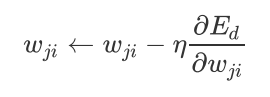  

关键之处在于偏导数的计算一定要正确。

可以设ε为一个很小的数（比如0.0001）  

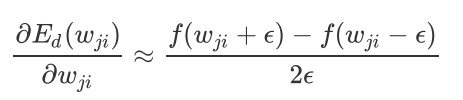  

利用上式来计算偏导数的值，然后同我们神经网络代码中计算出来的梯度值进行比较。如果两者的差别非常的小，那么就说明我们的代码是正确的。
<style>
    img[alt="梯度检查.png"]{
        height:60px;
    }
    img[alt="梯度检查2.png"]{
        height:70px;  
    }
</style>

如果我们想检查参数wji的梯度是否正确，我们需要以下几个步骤：  
1. 首先使用一个样本d对神经网络进行训练，这样就能获得每个权重的梯度。  
2. 将wji加上一个很小的值(0.0001)，重新计算神经网络在这个样本d下的Ed+。  
3. 将wji减上一个很小的值(0.0001)，重新计算神经网络在这个样本d下的Ed-。  
4. 根据上式计算出期望的梯度值，和第一步获得的梯度值进行比较，它们应该几乎相等(至少4位有效数字相同)。  

当然，我们可以重复上面的过程，对每个权重wji都进行检查。也可以使用多个样本重复检查。  

In [ ]:
def gradient_check(network, sample_feature, sample_label):
    '''
    梯度检查
    network: 神经网络对象
    sample_feature: 样本的特征
    sample_label: 样本的标签
    '''
    # 计算网络误差
    network_error = lambda vec1, vec2: \
    0.5 * reduce(lambda a, b: a + b,
    map(lambda v: (v[0] - v[1]) * (v[0] - v[1]),
    zip(vec1, vec2)))

    # 获取网络在当前样本下每个连接的梯度
    network.get_gradient(sample_feature, sample_label)

    # 对每个权重做梯度检查
    for conn in network.connections.connections:
        # 获取指定连接的梯度
        actual_gradient = conn.get_gradient()
        # 增加一个很小的值，计算网络的误差
        epsilon = 0.0001
        conn.weight += epsilon
        error1 = network_error(network.predict(sample_feature), sample_label)
        # 减去一个很小的值，计算网络的误差
        conn.weight -= 2 * epsilon # 刚才加过了一次，因此这里需要减去2倍
        error2 = network_error(network.predict(sample_feature), sample_label)
        # 根据式6计算期望的梯度值
        expected_gradient = (error2 - error1) / (2 * epsilon)
        # 打印
        print('expected gradient: \t%f\nactual gradient: \t%f' % (
        expected_gradient, actual_gradient))

    

### 神经网络实战——手写数字识别
用大约有60000个手写字母的训练样本的MNIST数据集，训练我们的神经网络，然后再用训练好的网络去识别手写数字。  
数字只可能是0-9中的一个，这是个10分类问题。

#### 超参数的确定
首先需要确定**网络的层数**和**每层的节点数**。  

网络的层数根据经验设置，没有经验的话就多试几个值，训练不同层数的神经网络，看看哪个效果最好就用哪个。  
 网络层数越多越好，同时层数越多训练难度越大。对于全连接网络，隐藏层最好不要超过三层。可以先试试仅有一个隐藏层的神经网络效果怎么样（模型小，训练快）。

输入层节点数是确定的。因为MNIST数据集每个训练数据是28*28的图片，共784个像素，因此，输入层节点数应该是784，每个像素对应一个输入节点。  
输出层节点数也是确定的。因为是10分类，我们可以用10个节点，每个节点对应一个分类。输出层10个节点中，输出最大值的那个节点对应的分类，就是模型的预测结果。  
隐藏层节点数量是不好确定的，从1到100万都可以。下面有几个经验公式：  

![屏幕截图 2024-05-08 105254.png](<attachment:屏幕截图 2024-05-08 105254.png>)

可以根据上面的公式先设置一个隐藏层节点数。如果有时间，可以设置不同的节点数，分别训练，看看哪个效果最好就用哪个。  
此任务中设隐藏层节点数为300。  

神经网络之所以强大，是它提供了一种非常简单的方法去实现大量的参数。  
MNIST只有6万个训练样本，参数太多了很容易过拟合，效果反而不好。  
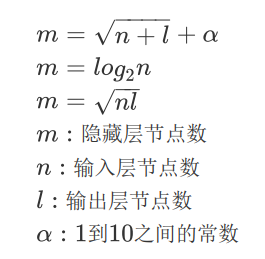

#### 模型的训练和评估
MNIST数据集包含10000个测试样本。我们先用60000个训练样本训练我们的网络，然后再用测试样本对网络进行测试。  

计算识别错误率：  
        错误率 = 错误预测样本数/总样本数  

每训练10轮，评估一次准确率。当准确率开始下降时（出现了过拟合）终止训练。


首先，把MNIST数据集处理为神经网络能够接受的形式。  

每个训练样本是一个28*28的图像，按照行优先，把它转化为一个784维的向量。  
每个标签是0-9的值，我们将其转换为一个10维的one-hot向量：如果标签值为n，我们就把向量的第n维（从0开始编号）设置为0.9，而其它维设置为0.1。  

In [ ]:
# 处理MNIST数据
#!/usr/bin/env python
# -*- coding: UTF-8 -*

import struct
from bp import *
from datetime import datetime

# 数据加载器基类
class Loader(object):
    def __init__(self, path, count):
        '''
        初始化加载器
        path: 数据文件路径
        count: 文件中的样本个数
        '''
        self.path = path
        self.count = count

    def get_file_content(self):
        '''
        读取文件内容
        '''
        f = open(self.path, 'rb')
        content = f.read()
        f.close()
        return content
    
    def to_int(self, byte):
        '''
        将unsigned byte字符转换为整数
        '''
        return struct.unpack('B', byte)[0]
    

# 图像数据加载器
class ImageLoader(Loader):
    def get_picture(self, content, index):
        '''
        内部函数，从文件中获取图像
        '''
        start = index * 28 * 28 + 16
        picture = []
        for i in range(28):
            picture.append([])
            for j in range(28):
                picture[i].append(
                self.to_int(content[start + i * 28 + j]))
        return picture
    
    def get_one_sample(self, picture):
        '''
        内部函数，将图像转化为样本的输入向量
        '''
        sample = []
        for i in range(28):
            for j in range(28):
                sample.append(picture[i][j])
        return sample
    
    def load(self):
        '''
        加载数据文件，获得全部样本的输入向量
        '''
        content = self.get_file_content()
        data_set = []
        for index in range(self.count):
            data_set.append(
            self.get_one_sample(
            self.get_picture(content, index)))
        return data_set
    


# 标签数据加载器
class LabelLoader(Loader):
    def load(self):
        '''
        加载数据文件，获得全部样本的标签向量
        '''
        content = self.get_file_content()
        labels = []
        for index in range(self.count):
            labels.append(self.norm(content[index + 8]))
        return labels
    
    def norm(self, label):
        '''
        内部函数，将一个值转换为10维标签向量
        '''
        label_vec = []
        label_value = self.to_int(label)
        for i in range(10):
            if i == label_value:
                label_vec.append(0.9)
            else:
                label_vec.append(0.1)
        return label_vec
    


def get_training_data_set():
    '''
    获得训练数据集
    '''
    image_loader = ImageLoader('train-images-idx3-ubyte', 60000)
    label_loader = LabelLoader('train-labels-idx1-ubyte', 60000)
    return image_loader.load(), label_loader.load()

def get_test_data_set():
    '''
    获得测试数据集
    '''
    image_loader = ImageLoader('t10k-images-idx3-ubyte', 10000)
    label_loader = LabelLoader('t10k-labels-idx1-ubyte', 10000)
    return image_loader.load(), label_loader.load()


In [ ]:
# 网络的输出是一个10维向量，这个向量第n个(从0开始编号)元素的值最大，那么n就是网络的识别结果。
def get_result(vec):
    max_value_index = 0
    max_value = 0
    for i in range(len(vec)):
        if vec[i] > max_value:
            max_value = vec[i]
            max_value_index = i
    return max_value_index

In [ ]:
# 使用错误率来对网络进行评估
def evaluate(network, test_data_set, test_labels):
    error = 0
    total = len(test_data_set)

    for i in range(total):
        label = get_result(test_labels[i])
        predict = get_result(network.predict(test_data_set[i]))
        if label != predict:
            error += 1
            
    return float(error) / float(total)

In [ ]:
# 实现训练策略：每训练10轮，评估一次准确率，当准确率开始下降时终止训练。
def train_and_evaluate():
    last_error_ratio = 1.0
    epoch = 0
    train_data_set, train_labels = get_training_data_set()
    test_data_set, test_labels = get_test_data_set()
    network = Network([784, 300, 10])
    while True:
        epoch += 1
        network.train(train_labels, train_data_set, 0.3, 1)
        print('%s epoch %d finished' % (now(), epoch))
        if epoch % 10 == 0:
            error_ratio = evaluate(network, test_data_set, test_labels)
            print('%s after epoch %d, error ratio is %f' % (now(), epoch, error_ratio))
            if error_ratio > last_error_ratio:
                break
            else:
                last_error_ratio = error_ratio


if __name__ == '__main__':
    train_and_evaluate()

1个epoch大约需要9000多秒，所以要对代码做很多的性能优化工作（比如用向量化编程）。  
训练要很久很久，可以把它上传到服务器上，在tmux的session里面去运行。  
为了防止异常终止导致前功尽弃，我们每训练10轮，就把获得参数值保存在磁盘上，以便后续可以恢复。  

### 向量化编程
向量化编程--一种更适合深度学习算法的编程方式，替代面向对象编程。

主要有两个原因：  
一是事实上并不需要真的去定义Node、Connection这样的对象，直接实现数学计算即可；  
二是底层算法库会针对向量运算做优化（甚至有专用的硬件，比如GPU），程序效率会提升很多。  

因此，在深度学习的世界里，我们总会想法设法的把计算表达为向量的形式。

#### 重新实现全连接神经网络

首先，我们需要把所有的计算都表达为向量的形式。  
主要有三个计算公式。  
前向计算：  

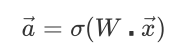

反向计算：

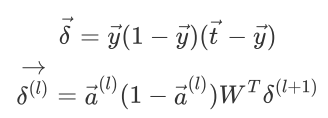

权重数组W和偏置项b的梯度计算：

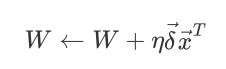

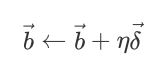



In [ ]:
# 根据上面几个公式，重新实现一个类：FullConnectedLayer。它实现了全连接层的前向和后向计算。
# 这个类取代了原先的Layer、Node、Connection等类，不但代码更加容易理解，而且运行速度也快了几百倍。

# 全连接层实现类
class FullConnectedLayer(object):
    def __init__(self, input_size, output_size, activator):
        '''
        构造函数
        input_size: 本层输入向量的维度
        output_size: 本层输出向量的维度
        activator: 激活函数
        '''
        self.input_size = input_size
        self.output_size = output_size
        self.activator = activator
        # 权重数组W
        self.W = np.random.uniform(-0.1, 0.1, (output_size, input_size))
        # 偏置项b
        self.b = np.zeros((output_size, 1))
        # 输出向量
        self.output = np.zeros((output_size, 1))

    def forward(self, input_array):
        '''
        前向计算
        input_array: 输入向量，维度必须等于input_size
        '''
        # 式2
        self.input = input_array
        self.output = self.activator.forward(np.dot(self.W, input_array) + self.b)

    def backward(self, delta_array):
        '''
        反向计算W和b的梯度
        delta_array: 从上一层传递过来的误差项
        '''
        # 式8
        self.delta = self.activator.backward(self.input) * np.dot(self.W.T, delta_array)
        self.W_grad = np.dot(delta_array, self.input.T)
        self.b_grad = delta_array

    def update(self, learning_rate):
        '''
        使用梯度下降算法更新权重
        '''
        self.W += learning_rate * self.W_grad
        self.b += learning_rate * self.b_grad


In [ ]:
# 对Network类稍作修改，使之用到FullConnectedLayer

# Sigmoid激活函数类
class SigmoidActivator(object):
    def forward(self, weighted_input):
        return 1.0 / (1.0 + np.exp(-weighted_input))
    
    def backward(self, output):
        return output * (1 - output)
    

# 神经网络类
class Network(object):
    def __init__(self, layers):
        '''
        构造函数
        '''
        self.layers = []
        for i in range(len(layers) - 1):
            self.layers.append(
            FullConnectedLayer(layers[i], layers[i+1],SigmoidActivator()))

    def predict(self, sample):
        '''
        使用神经网络实现预测
        sample: 输入样本
        '''
        output = sample
        for layer in self.layers:
            layer.forward(output)
        output = layer.output
        return output
    
    def train(self, labels, data_set, rate, epoch):
        '''
        训练函数
        labels: 样本标签
        data_set: 输入样本
        rate: 学习速率
        epoch: 训练轮数
        '''
        for i in range(epoch):
            for d in range(len(data_set)):
                self.train_one_sample(labels[d], data_set[d], rate)

    def train_one_sample(self, label, sample, rate):
        self.predict(sample)
        self.calc_gradient(label)
        self.update_weight(rate)

    def calc_gradient(self, label):
        delta = self.layers[-1].activator.backward(
        self.layers[-1].output) * (label - self.layers[-1].output)
        for layer in self.layers[::-1]:
            layer.backward(delta)
        delta = layer.delta
        return delta
    
    def update_weight(self, rate):
        for layer in self.layers:
            layer.update(rate)


In [ ]:
# 可以用新代码再次训练一下MNIST数据集。


## 卷积神经网络
一种更适合**图像**、**语音识别任务**的神经网络结构

### 一个新的激活函数——Relu
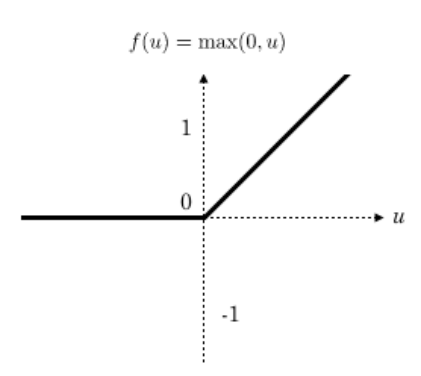

Relu函数作为激活函数，有几大优势：
1. 速度快
2. 减轻梯度消失问题
3. 稀疏性

### 全连接网络 VS 卷积网络
全连接神经网络之所以不太适合图像识别任务，主要有以下几个方面的问题：
1. 参数数量太多
2. 没有利用像素之间的位置信息
3. 网络层数限制

卷积神经网络可解决这些问题：
1. 局部连接
2. 权值共享
3. 下采样--使用Pooling来减少每层的样本数

### 卷积神经网络的网络架构
一个卷积神经网络由若干卷积层、Pooling 层、全连接层组成。可以构建各种不同的卷积神经网络。  
常用架构模式为N个卷积层叠加，然后(可选)叠加一个Pooling层，重复这个结构M次，最后叠加K个全连接层。  

### 卷积神经网络三维的层结构

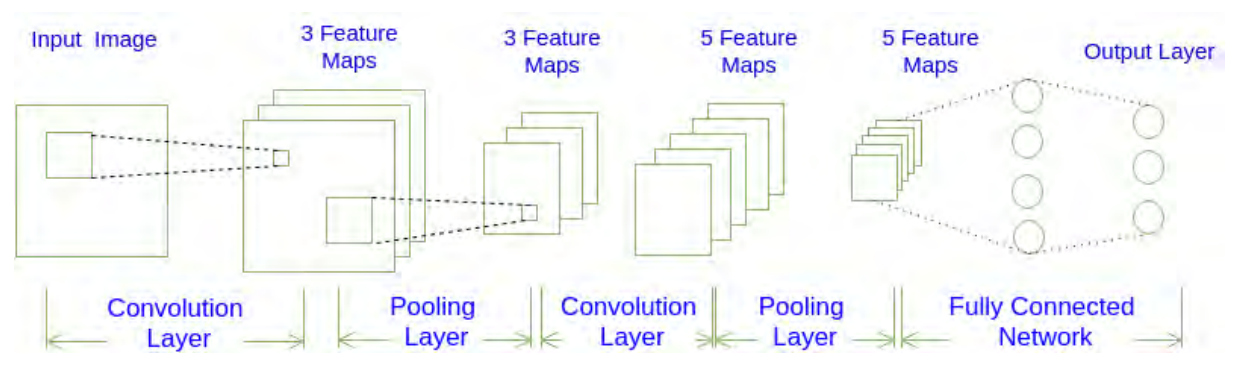

卷积神经网络的层结构和全连接神经网络的层结构有很大不同。  
全连接神经网络每层的神经元是按照一维排列的，也就是排成一条线的样子；  
而卷积神经网络每层的神经元是按照三维排列的，也就是排成一个长方体的样子，有宽度、高度和深度。

对于上图展示的神经网络，我们看到输入层的宽度和高度对应于输入图像的宽度和高度，而它的深度为1。

第一个卷积层对这幅图像进行了卷积操作，得到三个Feature Map。3指的是这个卷积层包含三个Filter，也就是三套参数，每个Filter都可以把原始输入图像卷积得到一个Feature Map。卷积层的Filter个数是一个超参数。我们可以把Feature Map可以看做是通过卷积变换提取到的图像特征，三个Filter就对原始图像提取出三组不同的特征，也就是得到了三个Feature Map，也称做三个通道(channel) 。

在第一个卷积层之后，Pooling层对三个Feature Map做了下采样，得到了三个更小的Feature Map。

第二个卷积层，有5个Filter。每个Fitler都把前面下采样之后的3个Feature Map卷积在一起，得到一个新的Feature Map。

网络的最后两层是全连接层。第一个全连接层的每个神经元，和上一层5个Feature Map中的每个神经元相连，第二个全连接层(也就是输出层)的每个神经元，则和第一个全连接层的每个神经元相连，这样得到了整个网络的输出。

### 卷积神经网络输出值的计算
#### 卷积层输出值的计算
假设有一个5 * 5的图像，使用一个3 * 3的filter进行卷积，会得到一个3 * 3的Feature Map。  

我们首先对图像的每个像素进行编号，用x(i,j)表示图像的第i行第j列元素；  
对filter的每个权重进行编号，用w(m,n)表示第m行第n列权重，用wb表示filter的偏置项；  
对Feature Map的每个元素进行编号，用a(i,j)表示Feature Map的第i行第j列元素；  
用f表示激活函数(这个例子选择relu函数作为激活函数)。  

则：  

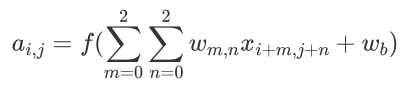

例：

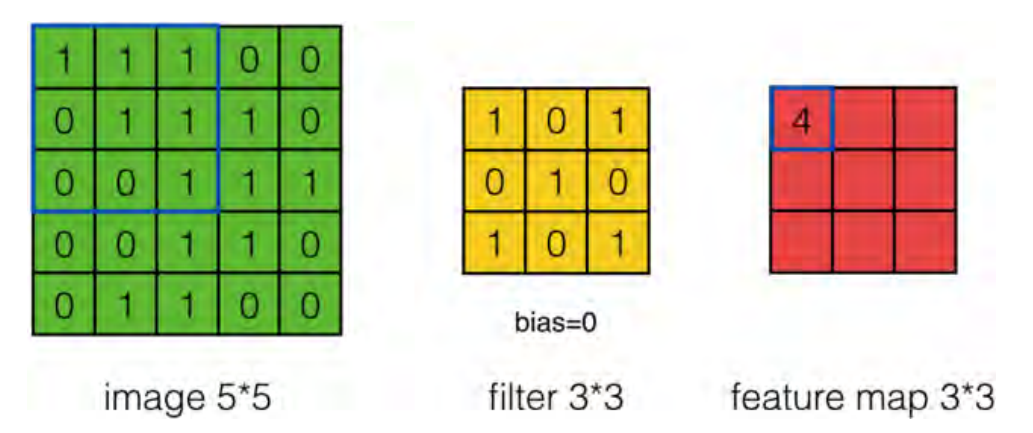

上面的计算过程中，步幅(stride)为1。步幅可以设为大于1的数。当步幅为2时，可得到2 * 2的Feature Map。  

卷积后的Feature Map大小和图像大小、步幅是有关系的：

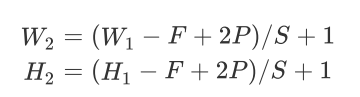

W2是卷积后Feature Map的宽度；W1是卷积前图像的宽度；F是filter的宽度；P是Zero Padding 数量，Zero Padding 是指
在原始图像周围补几圈0，如果P的值是1，那么就补1圈0，Zero padding 对于图像边缘部分的特征提取是很有帮助的；S是步幅；H2是卷积后Feature Map的高度；H1是卷积前图像的宽度。 

如果卷积前的图像深度为D，那么相应的filter的深度也必须为D。

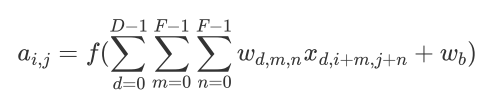

D是深度；F是filter的大小(宽度或高度，两者相同)；w(d,m,n)表示filter的第d层第m行第n列权重；a(d,i,j)表示图像的第d层第i行第j列像素。

每个卷积层可以有多个filter。卷积后Feature Map的深度(个数)和卷积层的filter个数是相同的。

上述计算体现了局部连接和权值共享：每层神经元只和上一层部分神经元相连(卷积计算规则)，且filter的权值对于上一
层所有神经元都是一样的。参数数量与上一层神经元个数无关。与全连接神经网络相比，参数数量大大减少了。


用卷积公式可以简化卷积神经网络的表达。  

数学中的卷积和卷积神经网络中的『卷积』是有区别的，为了避免混淆，把卷积神经网络中的『卷积』操作叫做互相关(cross-correlation) 操作。  
卷积和互相关操作是可以转化的。  

#### Pooling 层输出值的计算
Pooling层主要的作用是下采样，通过去掉Feature Map中不重要的样本，进一步减少参数数量。  

最常用的是**Max Pooling**--在n*n的样本中取最大值，作为采样后的样本值。  
例：2*2 max pooling -- 4 * 4 -> 2 * 2

常用的还有**Mean Pooling**--取各样本的平均值。  

对于深度为D的Feature Map，各层独立做Pooling，Pooling后的深度仍然为D。

#### 全连接层输出值的计算
全连接层输出值的计算和全连接神经网络是一样的。

### 卷积神经网络的训练
和全连接神经网络相比，卷积神经网络的训练要复杂一些。但训练的原理是一样的：利用链式求导计算损失函数对每个权重的偏导数（梯度），然后根据梯度下降公式更新权重。训练算法依然是反向传播算法。

之前介绍的反向传播算法，整个算法分为三个步骤：
1. 前向计算每个神经元的输出值aj
2. 反向计算每个神经元的误差项δj
3. 计算每个神经元连接权重wji的梯度
最后，根据梯度下降法则更新每个权重。

对于卷积神经网络，由于涉及到局部连接、下采样的等操作，影响到了第二步误差项δ的具体计算方法，而权值共享影响了第三步权重w的梯度的计算方法。

#### 卷积层的训练
先看上面的第二步，即如何将误差项δ传递到上一层；然后再看第三步，即如何计算filter每个权值w的梯度。

卷积层误差项的传递

最简单情况下误差项的传递  
先来考虑步长为1、输入的深度为1、filter个数为1的最简单的情况。

卷积步长为S时的误差传递

输入层深度为D时的误差传递

filter 数量为N时的误差传递

卷积层filter 权重梯度的计算

#### Pooling 层的训练
无论max pooling还是mean pooling，都没有需要学习的参数。因此，在卷积神经网络的训练中，Pooling层需要做的仅仅是将误差项传递到上一层，而没有梯度的计算。

Max Pooling 误差项的传递

Mean Pooling 误差项的传递

### 卷积神经网络的实现
与之前相比，要改变代码的架构，『层』成为了最核心的组件。这是因为卷积神经网络有不同的层，而每种层的算法都在对应的类中实现。

#### 卷积层的实现

In [ ]:
# 卷积层初始化
# 用ConvLayer 类来实现一个卷积层。可以在构造函数中设置卷积层的超参数。
class ConvLayer(object):
    def __init__(self, input_width, input_height, channel_number, filter_width,
    filter_height, filter_number, zero_padding, stride, activator, learning_rate):
        self.input_width = input_width
        self.input_height = input_height
        self.channel_number = channel_number
        self.filter_width = filter_width
        self.filter_height = filter_height
        self.filter_number = filter_number
        self.zero_padding = zero_padding
        self.stride = stride
        self.output_width = \
        ConvLayer.calculate_output_size(
        self.input_width, filter_width, zero_padding, stride)
        self.output_height = \
        ConvLayer.calculate_output_size(
        self.input_height, filter_height, zero_padding, stride)
        self.output_array = np.zeros((self.filter_number, self.output_height, self.output_width))
        self.filters = []
        for i in range(filter_number):
            self.filters.append(Filter(filter_width, filter_height, self.channel_number))
        self.activator = activator
        self.learning_rate = learning_rate

    # ConvLayer 类的forward 方法实现了卷积层的前向计算（即计算根据输入来计算卷积层的输出）
    def forward(self, input_array):
        '''
        计算卷积层的输出
        输出结果保存在self.output_array
        '''
        self.input_array = input_array
        self.padded_input_array = padding(input_array, self.zero_padding)
        for f in range(self.filter_number):
            filter = self.filters[f]
            conv(self.padded_input_array,
            filter.get_weights(), self.output_array[f],
            self.stride, filter.get_bias())
            element_wise_op(self.output_array, self.activator.forward)

    # 将误差项传递到上一层
    def bp_sensitivity_map(self, sensitivity_array, activator):
        '''
        计算传递到上一层的sensitivity map
        sensitivity_array: 本层的sensitivity map
        activator: 上一层的激活函数
        '''
        # 处理卷积步长，对原始sensitivity map进行扩展
        expanded_array = self.expand_sensitivity_map(sensitivity_array)

        # full卷积，对sensitivitiy map进行zero padding
        # 虽然原始输入的zero padding单元也会获得残差，但这个残差不需要继续向上传递，因此就不计算了
        expanded_width = expanded_array.shape[2]
        zp = (self.input_width + self.filter_width - 1 - expanded_width) / 2
        padded_array = padding(expanded_array, zp)

        # 初始化delta_array，用于保存传递到上一层的
        # sensitivity map
        self.delta_array = self.create_delta_array()

        # 对于具有多个filter的卷积层来说，最终传递到上一层的sensitivity map相当于所有的filter的sensitivity map之和
        for f in range(self.filter_number):
            filter = self.filters[f]
            # 将filter权重翻转180度
            flipped_weights = np.array(map(
            lambda i: np.rot90(i, 2), filter.get_weights()))
            # 计算与一个filter对应的delta_array
            delta_array = self.create_delta_array()
            for d in range(delta_array.shape[0]):
                conv(padded_array[f], flipped_weights[d], delta_array[d], 1, 0)
                self.delta_array += delta_array

        # 将计算结果与激活函数的偏导数做element-wise乘法操作
        derivative_array = np.array(self.input_array)
        element_wise_op(derivative_array, activator.backward)
        self.delta_array *= derivative_array

    # expand_sensitivity_map 方法就是将步长为S的sensitivity map『还原』为步长为1的sensitivity map
    def expand_sensitivity_map(self, sensitivity_array):
        depth = sensitivity_array.shape[0]
        # 确定扩展后sensitivity map的大小
        # 计算stride为1时sensitivity map的大小
        expanded_width = (self.input_width - self.filter_width + 2 * self.zero_padding + 1)
        expanded_height = (self.input_height - self.filter_height + 2 * self.zero_padding + 1)
        # 构建新的sensitivity_map
        expand_array = np.zeros((depth, expanded_height, expanded_width))
        # 从原始sensitivity map拷贝误差值
        for i in range(self.output_height):
            for j in range(self.output_width):
                i_pos = i * self.stride
                j_pos = j * self.stride
                expand_array[:,i_pos,j_pos] = sensitivity_array[:,i,j]
        return expand_array
    
    # create_delta_array 是创建用来保存传递到上一层的sensitivity map的数组。
    def create_delta_array(self):
        return np.zeros((self.channel_number, self.input_height, self.input_width))
    
    # 计算梯度
    def bp_gradient(self, sensitivity_array):
        # 处理卷积步长，对原始sensitivity map进行扩展
        expanded_array = self.expand_sensitivity_map(sensitivity_array)
        for f in range(self.filter_number):
            # 计算每个权重的梯度
            filter = self.filters[f]
            for d in range(filter.weights.shape[0]):
                conv(self.padded_input_array[d],
                expanded_array[f],
                filter.weights_grad[d], 1, 0)
            # 计算偏置项的梯度
            filter.bias_grad = expanded_array[f].sum()

    # 按照梯度下降算法更新参数
    def update(self):
        '''
        按照梯度下降，更新权重
        '''
        for filter in self.filters:
            filter.update(self.learning_rate)



In [ ]:
# forward里面包含了几个工具函数。element_wise_op 函数实现了对numpy 数组进行按元素操作，并将返回值写回到数组中
# 对numpy数组进行element wise操作
from data.common import get_patch
def element_wise_op(array, op):
    for i in np.nditer(array, op_flags=['readwrite']):
        i[...] = op(i)

# conv 函数实现了2维和3维数组的卷积
def conv(input_array, kernel_array, output_array, stride, bias):
    '''
    计算卷积，自动适配输入为2D和3D的情况
    '''
    channel_number = input_array.ndim
    output_width = output_array.shape[1]
    output_height = output_array.shape[0]
    kernel_width = kernel_array.shape[-1]
    kernel_height = kernel_array.shape[-2]
    for i in range(output_height):
        for j in range(output_width):
            output_array[i][j] = (
            get_patch(input_array, i, j, kernel_width, kernel_height, stride) * kernel_array).sum() + bias

# padding 函数实现了zero padding操作
# 为数组增加Zero padding
def padding(input_array, zp):
    '''
    为数组增加Zero padding，自动适配输入为2D和3D的情况
    '''
    if zp == 0:
        return input_array
    else:
        if input_array.ndim == 3:
            input_width = input_array.shape[2]
            input_height = input_array.shape[1]
            input_depth = input_array.shape[0]
            padded_array = np.zeros((
            input_depth,
            input_height + 2 * zp,
            input_width + 2 * zp))
            padded_array[:,
            zp : zp + input_height,
            zp : zp + input_width] = input_array
            return padded_array
        elif input_array.ndim == 2:
            input_width = input_array.shape[1]
            input_height = input_array.shape[0]
            padded_array = np.zeros((
            input_height + 2 * zp,
            input_width + 2 * zp))
            padded_array[zp : zp + input_height,
            zp : zp + input_width] = input_array
            return padded_array

In [ ]:
# calculate_output_size 函数用来确定卷积层输出的大小
@staticmethod
def calculate_output_size(input_size, filter_size, zero_padding, stride):
    return (input_size - filter_size + 2 * zero_padding) / stride + 1

In [ ]:
# Filter 类保存了卷积层的参数以及梯度，并且实现了用梯度下降算法来更新参数。
# 我们对参数的初始化采用了常用的策略，即：权重随机初始化为一个很小的值，而偏置项初始化为0。
class Filter(object):
    def __init__(self, width, height, depth):
        self.weights = np.random.uniform(-1e-4, 1e-4, (depth, height, width))
        self.bias = 0
        self.weights_grad = np.zeros(self.weights.shape)
        self.bias_grad = 0

    def __repr__(self):
        return 'filter weights:\n%s\nbias:\n%s' % (repr(self.weights), repr(self.bias))
    
    def get_weights(self):
        return self.weights
    
    def get_bias(self):
        return self.bias
    
    def update(self, learning_rate):
        self.weights -= learning_rate * self.weights_grad
        self.bias -= learning_rate * self.bias_grad

In [ ]:
# Activator 类实现了激活函数，其中，forward 方法实现了前向计算，而backward 方法则是计算导数。
# 比如，relu函数的实现如下

class ReluActivator(object):
    def forward(self, weighted_input):
        #return weighted_input
        return max(0, weighted_input)

    def backward(self, output):
        return 1 if output > 0 else 0

卷积层前向计算的实现

ConvLayer 类的forward 方法

卷积层反向传播算法的实现

卷积层核心算法。反向传播算法需要完成几个任务：
1. 将误差项传递到上一层。
2. 计算每个参数的梯度。
3. 更新参数。

ConvLayer类中实现(bp_sensitivity_map expand_sensitivity_map create_delta_array bp_gradient update)。

卷积层的梯度检查  
--为了验证公式推导和代码实现的正确性

运行梯度检查的代码，得到输出，若期望的梯度和实际计算出的梯度一致，证明我们的算法推导和代码实现确实是正确的。

In [ ]:
# 卷积层的梯度检查
def init_test():
    a = np.array([[[0,1,1,0,2],
                   [2,2,2,2,1],
                   [1,0,0,2,0],
                   [0,1,1,0,0],
                   [1,2,0,0,2]],
                  [[1,0,2,2,0],
                   [0,0,0,2,0],
                   [1,2,1,2,1],
                   [1,0,0,0,0],
                   [1,2,1,1,1]],
                  [[2,1,2,0,0],
                   [1,0,0,1,0],
                   [0,2,1,0,1],
                   [0,1,2,2,2],
                   [2,1,0,0,1]]])
    b = np.array([[[0,1,1],
                   [2,2,2],
                   [1,0,0]],
                  [[1,0,2],
                   [0,0,0],
                   [1,2,1]]])
    cl = ConvLayer(5,5,3,3,3,2,1,2,IdentityActivator(),0.001)
    cl.filters[0].weights = np.array([[[-1,1,0],
                                       [0,1,0],
                                       [0,1,1]],
                                      [[-1,-1,0],
                                       [0,0,0],
                                       [0,-1,0]],
                                      [[0,0,-1],
                                       [0,1,0],
                                       [1,-1,-1]]], dtype=np.float64)
    cl.filters[0].bias=1
    cl.filters[1].weights = np.array([[[1,1,-1],
                                       [-1,-1,1],
                                       [0,-1,1]],
                                      [[0,1,0],
                                       [-1,0,-1],
                                       [-1,1,0]],
                                      [[-1,0,0],
                                       [-1,0,1],
                                       [-1,0,0]]], dtype=np.float64)
    return a, b, cl

def gradient_check():
    '''
    梯度检查
    '''
    # 设计一个误差函数，取所有节点输出项之和
    error_function = lambda o: o.sum()

    # 计算forward值
    a, b, cl = init_test()
    cl.forward(a)

    # 求取sensitivity map，是一个全1数组
    sensitivity_array = np.ones(cl.output_array.shape, dtype=np.float64)
    # 计算梯度
    cl.backward(a, sensitivity_array, IdentityActivator())
    # 检查梯度
    epsilon = 10e-4
    for d in range(cl.filters[0].weights_grad.shape[0]):
        for i in range(cl.filters[0].weights_grad.shape[1]):
            for j in range(cl.filters[0].weights_grad.shape[2]):
                cl.filters[0].weights[d,i,j] += epsilon
                cl.forward(a)
                err1 = error_function(cl.output_array)
                cl.filters[0].weights[d,i,j] -= 2*epsilon
                cl.forward(a)
                err2 = error_function(cl.output_array)
                expect_grad = (err1 - err2) / (2 * epsilon)
                cl.filters[0].weights[d,i,j] += epsilon
                print('weights(%d,%d,%d): expected - actural %f - %f' % (
                d, i, j, expect_grad, cl.filters[0].weights_grad[d,i,j]))


#### Max Pooling 层的实现

In [ ]:
class MaxPoolingLayer(object):
    def __init__(self, input_width, input_height,
    channel_number, filter_width, filter_height, stride):
        self.input_width = input_width
        self.input_height = input_height
        self.channel_number = channel_number
        self.filter_width = filter_width
        self.filter_height = filter_height
        self.stride = stride
        self.output_width = (input_width - filter_width) / self.stride + 1
        self.output_height = (input_height - filter_height) / self.stride + 1
        self.output_array = np.zeros((self.channel_number, self.output_height, self.output_width))

    def forward(self, input_array):
        for d in range(self.channel_number):
            for i in range(self.output_height):
                for j in range(self.output_width):
                    self.output_array[d,i,j] = (
                    get_patch(input_array[d], i, j,
                    self.filter_width, self.filter_height, self.stride).max())

    def backward(self, input_array, sensitivity_array):
        self.delta_array = np.zeros(input_array.shape)
        for d in range(self.channel_number):
            for i in range(self.output_height):
                for j in range(self.output_width):
                    patch_array = get_patch(
                    input_array[d], i, j,
                    self.filter_width, self.filter_height, self.stride)
                    k, l = get_max_index(patch_array)
                    self.delta_array[d, i * self.stride + k, j * self.stride + l] = sensitivity_array[d,i,j]

#### 全连接层的实现
和之前类似

### 卷积神经网络的应用
MNIST手写数字识别  
LeNet-5是实现手写数字识别的卷积神经网络，在MNIST测试集上，取得了0.8%的错误率。

## 循环神经网络
全连接神经网络和卷积神经网络，都只能**单独**的取处理一个个的输入，前一个输入和后一个输入是完全没有关系的。  
但是，某些任务需要能够更好的处理**序列**的信息，即前面的输入和后面的输入是有关系的。比如一句话，一个视频。

### 语言模型
RNN是在自然语言处理领域中最先被用起来的，比如，RNN可以为语言模型来建模。

**语言模型**--给定一个一句话前面的部分，预测接下来最有可能的一个词是什么。  
语言模型是对一种语言的特征进行建模，它有很多用处。比如在语音转文本(STT)的应用中，声学模型输出的结果，往往是若干个可能的候选词，这时候就需要语言模型来从这些候选词中选择一个最可能的。它同样也可以用在图像到文本的识别中(OCR)。  

使用RNN之前，语言模型主要是采用N-Gram。假设一个词出现的概率只与前面N个词相关。  
可能会得不到最关键的信息  
要想处理任意长度的句子，N设为多少都不合适；且模型的大小和N的关系是指数级的，4-Gram模型就会占用海量的存储空间。

**RNN理论上可以往前看(往后看)任意多个词。**

### 循环神经网络分类
#### 基本循环神经网络
由**输入层**、一个**隐藏层**和一个**输出层**组成：

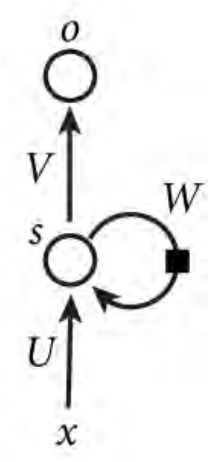

如果把上面有W的那个带箭头的圈去掉，它就变成了最普通的全连接神经网络。  
x是一个向量，它表示输入层的值（这里面没有画出来表示神经元节点的圆圈）；  
s是一个向量，它表示隐藏层的值（这里隐藏层面画了一个节点，你也可以想象这一层其实是多个节点，节点数与向量s的维度相同）；  
U是输入层到隐藏层的权重矩阵；  
o也是一个向量，它表示输出层的值；  
V是隐藏层到输出层的权重矩阵。  

**循环神经网络的隐藏层的值s不仅仅取决于当前这次的输入x，还取决于上一次隐藏层的值s。**权重矩阵W就是隐藏层上一次的值作为这一次的输入的权重。

把上面的图展开：

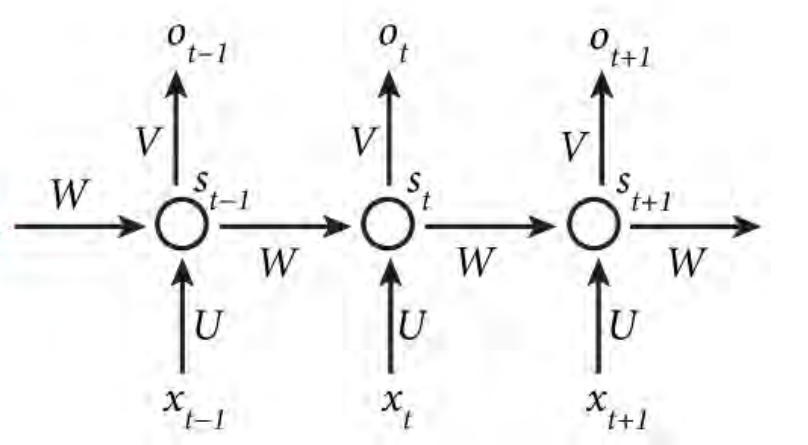

这个网络在t时刻接收到输入xt之后，隐藏层的值是st，输出值是ot。关键一点是，st的值不仅仅取决于xt，还取决于s(t-1)。

可以用公式表示循环神经网络的计算方法：

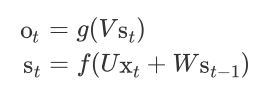

输出层是一个**全连接层**，它的每个节点都和隐藏层的每个节点相连。V是输出层的权重矩阵，g是激活函数。  
隐藏层是**循环层**。U是输入x的权重矩阵，W是上一次的值s(t-1)作为这一次的输入的权重矩阵，f是激活函数。  
循环层和全连接层的区别就是循环层多了一个权重矩阵W。  
循环神经网络的输出值ot，是受前面历次输入值xt、x(t-1)、x(t-2)、x(t-3)、...影响的，这就是为什么循环神经网络可以往前看任意多个输入值的原因。  

#### 双向循环神经网络
对于语言模型来说，很多时候光看前面的词是不够的。  

双向循环神经网络，如图所示：

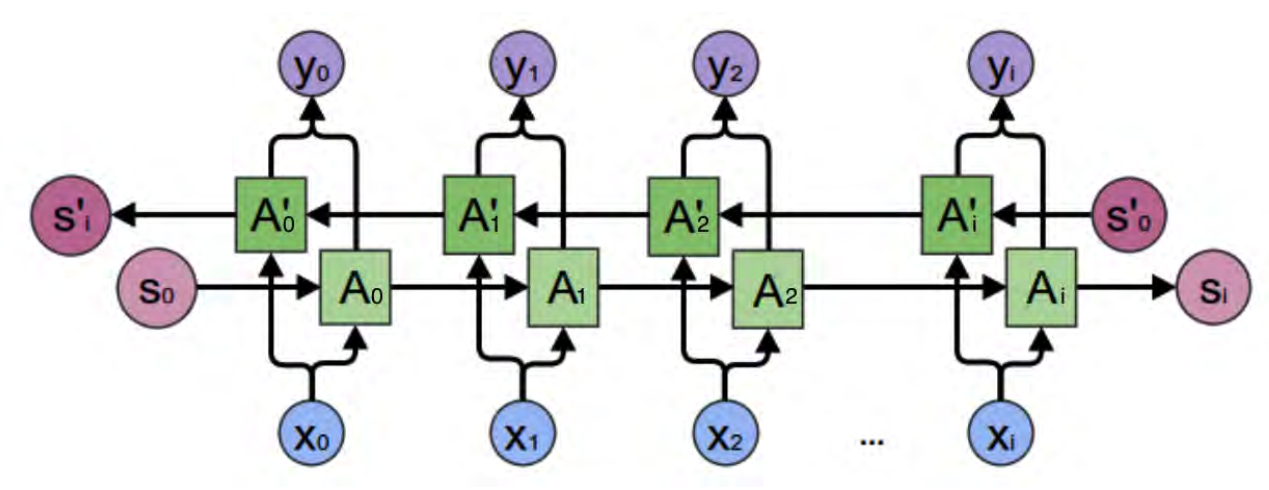

双向卷积神经网络的隐藏层要保存两个值，一个A参与正向计算，另一个值A'参与反向计算。最终的输出值y2取决于A2和A2'。

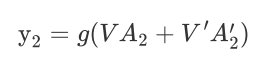

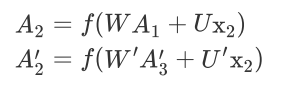

正向计算时，隐藏层的值st与s(t-1)有关；反向计算时，隐藏层的值st'与s(t+1)'有关；最终的输出取决于正向和反向计算的加和。

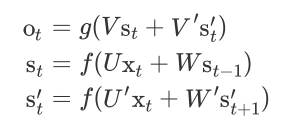

**正向计算和反向计算不共享权重**，也就是说U和U'、W和W'、V和V'都是不同的权重矩阵。

#### 深度循环神经网络
堆叠**两个以上隐藏层**  

把第i个隐藏层的值表示为st(i)、st'(i)，则深度循环神经网络的计算方式可以表示为：

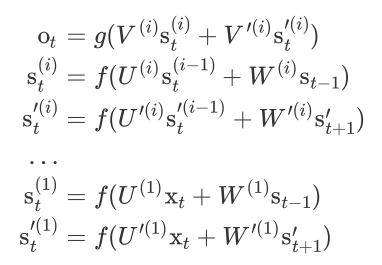

### 循环神经网络的训练
循环神经网络的训练算法：BPTT  
BPTT算法是针对循环层的训练算法，基本原理和BP算法一样，同样包含**三个步骤**：  
1. **前向计算**每个神经元的输出值；
2. **反向计算**每个神经元的误差项δj值，它是误差函数E对神经元j的加权输入netj的偏导数；
3. 计算每个权重的**梯度**。
最后再用随机梯度下降算法更新权重。

#### RNN的梯度爆炸和消失问题
前面介绍的几种RNN并不能很好的处理较长的序列。  
一个主要的原因是，RNN在训练中很容易发生**梯度爆炸**和**梯度消失**，导致训练时梯度不能在较长序列中一直传递下去，从而使RNN**无法捕捉到长距离的影响**。  

通常来说，梯度爆炸更容易处理一些。因为梯度爆炸时，程序会收到NaN错误。  
也可以设置一个梯度阈值，当梯度超过这个阈值的时候可以直接截取。  

梯度消失更难检测，也更难处理。有三种方法应对梯度消失问题：  
1. 合理初始化权重值。初始化权重，使每个神经元尽可能不要取极大或极小值，以躲开梯度消失的区域。
2. 使用relu代替sigmoid和tanh作为激活函数。
3. **使用其他结构的RNNs**，比如长短时记忆网络（LTSM）和Gated Recurrent Unit（GRU），这是最流行的做法。

### RNN的应用举例——基于RNN的语言模型

### RNN的实现
实现一个RNN层

In [ ]:
# 复用了卷积神经网络中的一些代码--ReluActivator, IdentityActivator, element_wise_op
import numpy as np

In [ ]:
# 用RecurrentLayer类来实现一个循环层。
class RecurrentLayer(object):
    def __init__(self, input_width, state_width, activator, learning_rate):
        # 初始化一个循环层，可以设置卷积层的超参数。循环层有两个权重数组，U和W。
        self.input_width = input_width
        self.state_width = state_width
        self.activator = activator
        self.learning_rate = learning_rate
        self.times = 0 # 当前时刻初始化为t0
        self.state_list = [] # 保存各个时刻的state
        self.state_list.append(np.zeros((state_width, 1))) # 初始化s0
        self.U = np.random.uniform(-1e-4, 1e-4,(state_width, input_width)) # 初始化U
        self.W = np.random.uniform(-1e-4, 1e-4,(state_width, state_width)) # 初始化W
    def forward(self, input_array):
        # 实现循环层的前向计算
        self.times += 1
        state = (np.dot(self.U, input_array) + np.dot(self.W, self.state_list[-1]))
        element_wise_op(state, self.activator.forward)
        self.state_list.append(state)
    def backward(self, sensitivity_array, activator):
        # 实现BPTT算法
        self.calc_delta(sensitivity_array, activator)
        self.calc_gradient()

    def calc_delta(self, sensitivity_array, activator):
        self.delta_list = [] # 用来保存各个时刻的误差项
        for i in range(self.times):
            self.delta_list.append(np.zeros((self.state_width, 1)))
            self.delta_list.append(sensitivity_array)
        # 迭代计算每个时刻的误差项
        for k in range(self.times - 1, 0, -1):
            self.calc_delta_k(k, activator)
    def calc_delta_k(self, k, activator):
        # 根据k+1时刻的delta计算k时刻的delta
        state = self.state_list[k+1].copy()
        element_wise_op(self.state_list[k+1], activator.backward)
        self.delta_list[k] = np.dot(np.dot(self.delta_list[k+1].T, self.W),np.diag(state[:,0])).T

    def calc_gradient(self):
        self.gradient_list = [] # 保存各个时刻的权重梯度
        for t in range(self.times + 1):
            self.gradient_list.append(np.zeros((self.state_width, self.state_width)))
        for t in range(self.times, 0, -1):
            self.calc_gradient_t(t)
            # 实际的梯度是各个时刻梯度之和
            self.gradient = reduce(lambda a, b: a + b, self.gradient_list, self.gradient_list[0]) # [0]被初始化为0且没有被修改过
    def calc_gradient_t(self, t):
        # 计算每个时刻t权重的梯度
        gradient = np.dot(self.delta_list[t], self.state_list[t-1].T)
        self.gradient_list[t] = gradient

    def update(self):
        # 按照梯度下降，更新权重
        self.W -= self.learning_rate * self.gradient
        # 代码不包含权重U的更新。这部分实际上和全连接神经网络是一样的

    # 循环层是一个带状态的层，每次forword都会改变循环层的内部状态，这给梯度检查带来了麻烦。
    # 因此，需要一个reset_state方法，来重置循环层的内部状态。
    def reset_state(self):
        self.times = 0 # 当前时刻初始化为t0
        self.state_list = [] # 保存各个时刻的state
        self.state_list.append(np.zeros((self.state_width, 1))) # 初始化s0


In [ ]:
# 梯度检查
def gradient_check():
    # 设计一个误差函数，取所有节点输出项之和
    error_function = lambda o: o.sum()

    rl = RecurrentLayer(3, 2, IdentityActivator(), 1e-3)

    # 计算forward值
    x, d = data_set()
    rl.forward(x[0])
    rl.forward(x[1])
    # 求取sensitivity map
    sensitivity_array = np.ones(rl.state_list[-1].shape, dtype=np.float64)
    # 计算梯度
    rl.backward(sensitivity_array, IdentityActivator())

    # 检查梯度
    epsilon = 10e-4
    for i in range(rl.W.shape[0]):
        for j in range(rl.W.shape[1]):
            rl.W[i,j] += epsilon
            rl.reset_state()  # 每次计算error之前，都要调用reset_state方法重置循环层的内部状态。
            rl.forward(x[0])
            rl.forward(x[1])
            err1 = error_function(rl.state_list[-1])
            rl.W[i,j] -= 2*epsilon
            rl.reset_state()  # 每次计算error之前，都要调用reset_state方法重置循环层的内部状态。
            rl.forward(x[0])
            rl.forward(x[1])
            err2 = error_function(rl.state_list[-1])
            expect_grad = (err1 - err2) / (2 * epsilon)
            rl.W[i,j] += epsilon
            print('weights(%d,%d): expected - actural %f - %f' % (i, j, expect_grad, rl.gradient[i,j]))
            